# Single Filter Experiment

In [1]:

import tarfile
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from experiments.grid_size.experiment import GridSizeExperiment
from commands.datastore import Datastore
from functools import reduce
from parse import parse
import matplotlib.ticker as ticker

sns.set_theme(context="paper", font="qhv", style="ticks", rc={
    "text.usetex" : True,
})

data_store = Datastore().derive("single_filter")
figures = data_store / "figures"
figures.mkdir(exist_ok=True, parents=True)

In [2]:
import os
from pathlib import Path

def create_df(best_solution = False) -> pd.DataFrame:
    for i in range(1, 31, 1):
        df = pd.read_csv(data_store / "conv1_0_0_5_5" / "train_statistics" / "fitness" / f"statistics.{i}.csv")
        df["error"] = df["error"] / 16
        df["grid"] = "5,5"
        if best_solution:
            yield df.tail(n=1)
        else:
            yield df

def load_df(best_solution = False):
    df = pd.concat([df for df in create_df(best_solution)])
    df.drop(columns="depth", inplace=True, errors="ignore")
    # df.drop_duplicates(subset=["generation"], inplace=True)
    df.columns = df.columns.str.replace("_", " ").str.title()
    df.rename(columns={"Mse Threshold": "MSE Threshold"}, inplace=True)
    df["MSE Threshold"] = 0
    return df

def get_best_solutions(df):
    best_solutions = []
    chromosomes_df: pd.DataFrame = df.dropna().sort_values(by=["Error", "Energy", "Delay", "Gate Count"], ascending=True)
    
    groups = chromosomes_df.groupby(by=["Experiment", "Run"])
    best_solutions = groups.apply(pd.DataFrame.head, n=1)
    return best_solutions  

fitness_columns = ["Error", "Energy", "Area", "Gate Count", "Delay"]
fitness_columns_no_delay = ["Error", "Energy", "Area", "Gate Count"]
quantized_columns = ["Error", "Quantized Energy", "Quantized Delay"]

### Load Data

In [3]:
df = load_df(best_solution=True)
df

,Run,Generation,Timestamp,Error,Quantized Energy,Energy,Area,Quantized Delay,Delay,Gate Count,Chromosome,Grid,MSE Threshold
100,1,1103351,177.216245,0.0,872492723985542524,0.179198,658.897193,3.335576e+18,0.66,20,"{9,16,5,5,2,5,5}([9]1,0,5)([10]6,4,4)([11]0,8,...","5,5",0
103,2,964979,155.659213,0.0,112981414757762807,0.023205,220.570995,4.801207e+18,0.95,18,"{9,16,5,5,2,5,5}([9]6,1,6)([10]1,4,7)([11]4,1,...","5,5",0
114,3,1217965,202.764607,0.0,138638515886722967,0.028474,265.154495,4.801207e+18,0.95,17,"{9,16,5,5,2,5,5}([9]1,1,7)([10]8,2,13)([11]0,4...","5,5",0
95,4,1108163,181.750454,0.0,2339424972745691857,0.480485,1307.469793,8.591634e+18,1.70,18,"{9,16,5,5,2,5,5}([9]4,2,6)([10]5,1,27)([11]0,1...","5,5",0
108,5,766560,120.711595,0.0,859008299160429705,0.176428,648.103294,3.891505e+18,0.77,20,"{9,16,5,5,2,5,5}([9]1,1,16)([10]3,4,21)([11]7,...","5,5",0
90,6,1151773,190.358260,0.0,768269332433005299,0.157792,565.037192,1.718327e+18,0.34,19,"{9,16,5,5,2,5,5}([9]4,3,6)([10]7,8,1)([11]7,0,...","5,5",0
91,7,925420,151.213806,0.0,767120070625704390,0.157556,555.181891,3.739888e+18,0.74,20,"{9,16,5,5,2,5,5}([9]3,5,5)([10]7,6,1)([11]0,5,...","5,5",0
79,8,1138736,188.038548,0.0,160460843861017769,0.032956,372.154893,4.700129e+18,0.93,19,"{9,16,5,5,2,5,5}([9]6,6,5)([10]1,4,11)([11]7,0...","5,5",0
103,9,1162104,192.107867,0.0,115501575026198833,0.023722,196.636697,3.133420e+18,0.62,18,"{9,16,5,5,2,5,5}([9]1,4,20)([10]7,6,9)([11]5,2...","5,5",0
89,10,1059393,171.004295,0.0,1625015985691793657,0.333755,959.718494,5.458215e+18,1.08,18,"{9,16,5,5,2,5,5}([9]7,4,10)([10]4,6,6)([11]0,1...","5,5",0


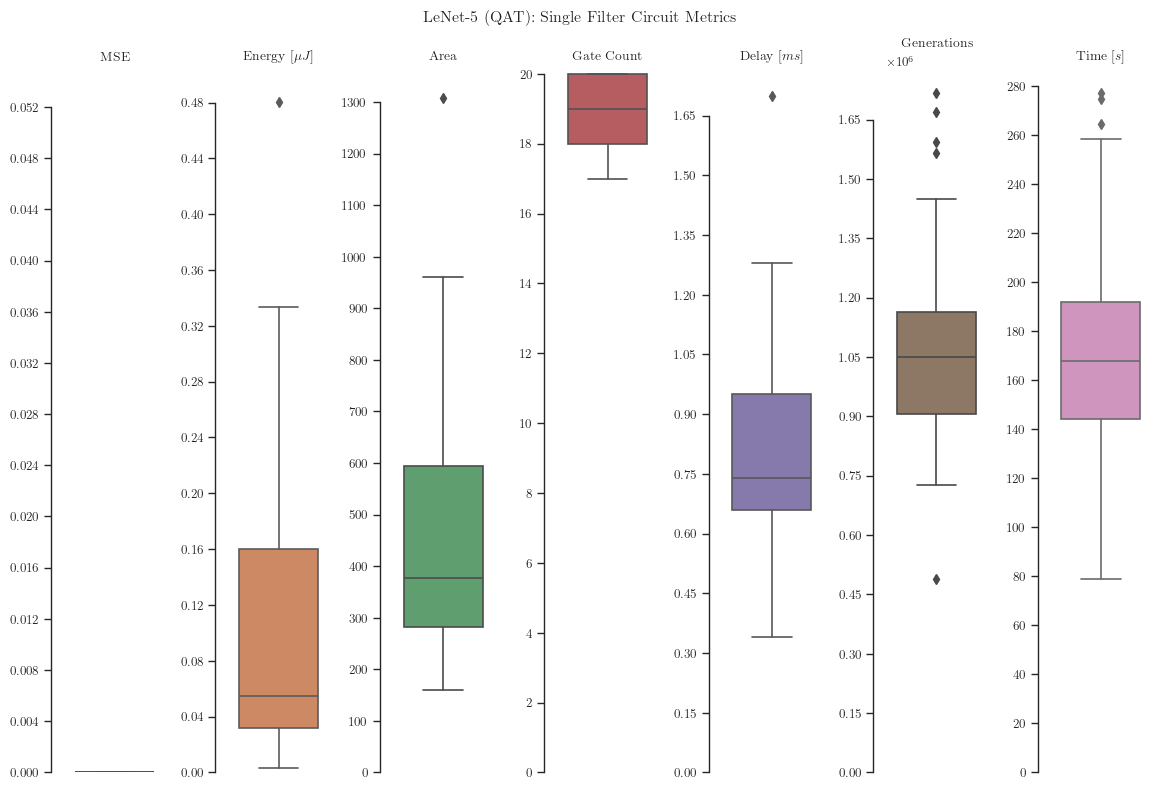

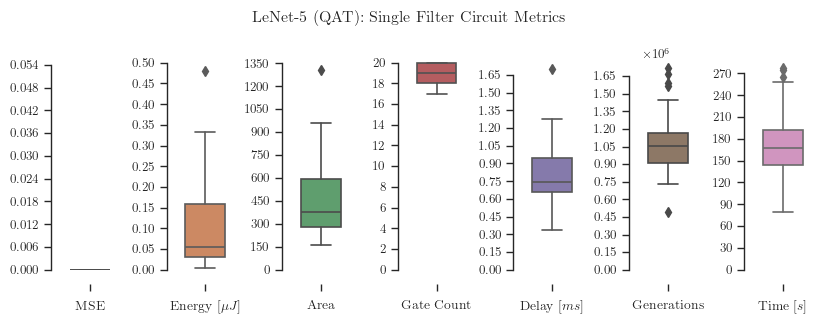

In [4]:
sns.set_theme(context="paper", font="qhv", style="ticks", rc={
    "text.usetex" : True,
})

titles = {
    "Error": "MSE",
    "Energy": "Energy [$\mu J$]",
    "Area": "Area",
    "Delay": "Delay [$ms$]",
    "Gate Count": "Gate Count",
    "Generation": "Generations",
    "Timestamp": "Time $[s]$"
}

def plot(solutions_df, col, ax, i, sharex_index=True, landscape=False):
    tick_count = min((solutions_df["Gate Count"].max() + 1) // (2 if not landscape else 1), 15)
    if col == "Timestamp":
        solutions_df = solutions_df.groupby(by=["Run"])["Timestamp"].max().reset_index()        
    g = sns.boxplot(data=solutions_df, y=col, ax=ax, color=sns.color_palette()[i])
    g.yaxis.set_major_locator(plt.MaxNLocator(tick_count, min_n_ticks=10, integer=(col=="Gate Count")))
    g.set_ylim(0)
    if landscape:
        g.set_title(titles[col])
        g.xaxis.set_visible(False)
    else:
        g.set(xlabel=titles[col])
    g.set_ylabel(None)
    # g.tick_params(axis="x", rotation=90)
    return g    

def plot_columns(df, columns, r, c, sharex=True, landscape=False):
    fig, axes = plt.subplots(r, c, figsize=(8.27 if not landscape else 11.69, 3.25 if not landscape else 8))
    for col, ax, i in zip(columns, axes.flat, range(r*c)):
        plot(df, col, ax, i, c if sharex else 0, landscape=landscape)    
    return fig

solutions_df = load_df(best_solution=True)

fig_all = plot_columns(solutions_df, fitness_columns + ["Generation", "Timestamp"], 1, 7, landscape=True)
sns.despine(offset=10, bottom=False, left=False, trim=True, fig=fig_all)
fig_all.suptitle("LeNet-5 (QAT): Single Filter Circuit Metrics")
fig_all.tight_layout()
fig_all.savefig(figures / "boxplot.png")
fig_all.savefig(figures / "boxplot.pdf")
fig_all.savefig(figures / "boxplot.svg")

fig_brief = plot_columns(solutions_df, fitness_columns + ["Generation", "Timestamp"], 1, 7, sharex=False)
fig_brief.suptitle("LeNet-5 (QAT): Single Filter Circuit Metrics")
sns.despine(offset=10, bottom=False, left=False, trim=True, fig=fig_brief)
fig_brief.tight_layout()
fig_brief.savefig(figures / "boxplot_brief.png")
fig_brief.savefig(figures / "boxplot_brief.pdf")
fig_brief.savefig(figures / "boxplot_brief.svg")

